# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [4]:
# Import necessary libraries 🔧
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Load your uploaded file (path "/content/listings.csv.gz") 🔧
df= pd.read_csv('listings.csv.gz')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7780 entries, 0 to 7779
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7780 non-null   int64  
 1   listing_url                                   7780 non-null   object 
 2   scrape_id                                     7780 non-null   int64  
 3   last_scraped                                  7780 non-null   object 
 4   source                                        7780 non-null   object 
 5   name                                          7780 non-null   object 
 6   description                                   7688 non-null   object 
 7   neighborhood_overview                         4683 non-null   object 
 8   picture_url                                   7780 non-null   object 
 9   host_id                                       7780 non-null   i

## 2. Explore Missing Values

Business framing:

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

Explore how complete your dataset is:
- Count the null values of each column
- Create visuals (e.g. heatmaps, boxplots, bar charts, etc) to help show what columns are missing values
- Keep in mind which column(s) are missing too much data, you will delete these in the next step

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



In [6]:
# Add code here 🔧
df.isnull().sum()

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
...,...
calculated_host_listings_count,0
calculated_host_listings_count_entire_homes,0
calculated_host_listings_count_private_rooms,0
calculated_host_listings_count_shared_rooms,0


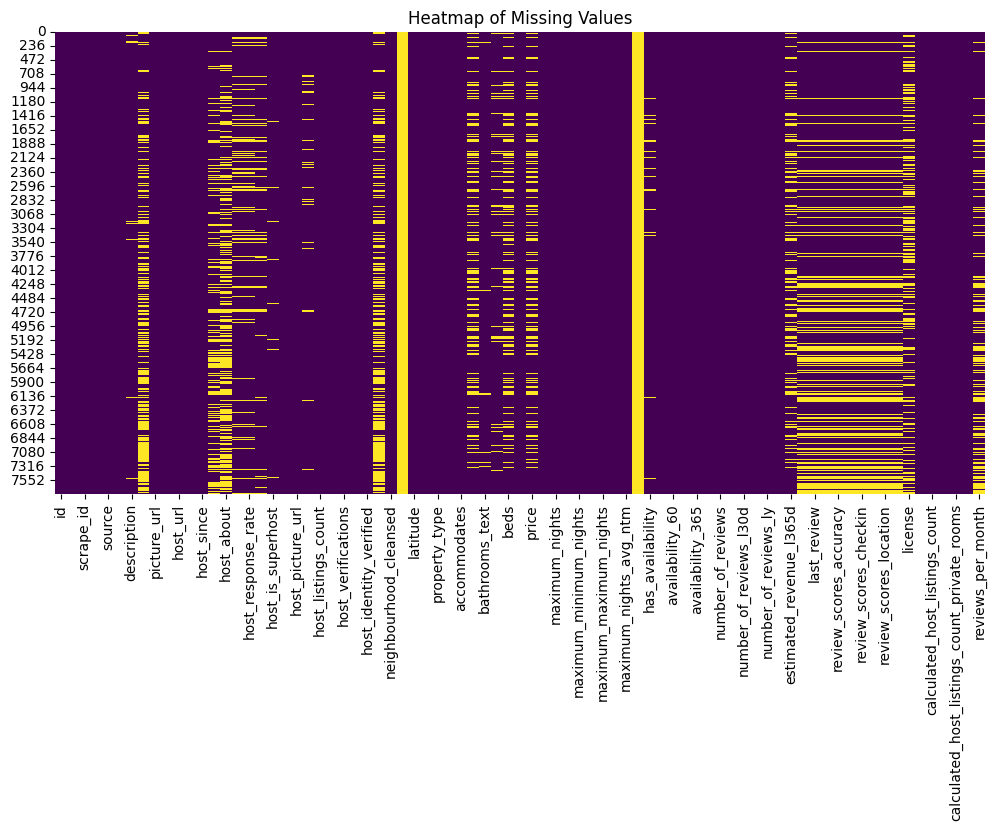

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

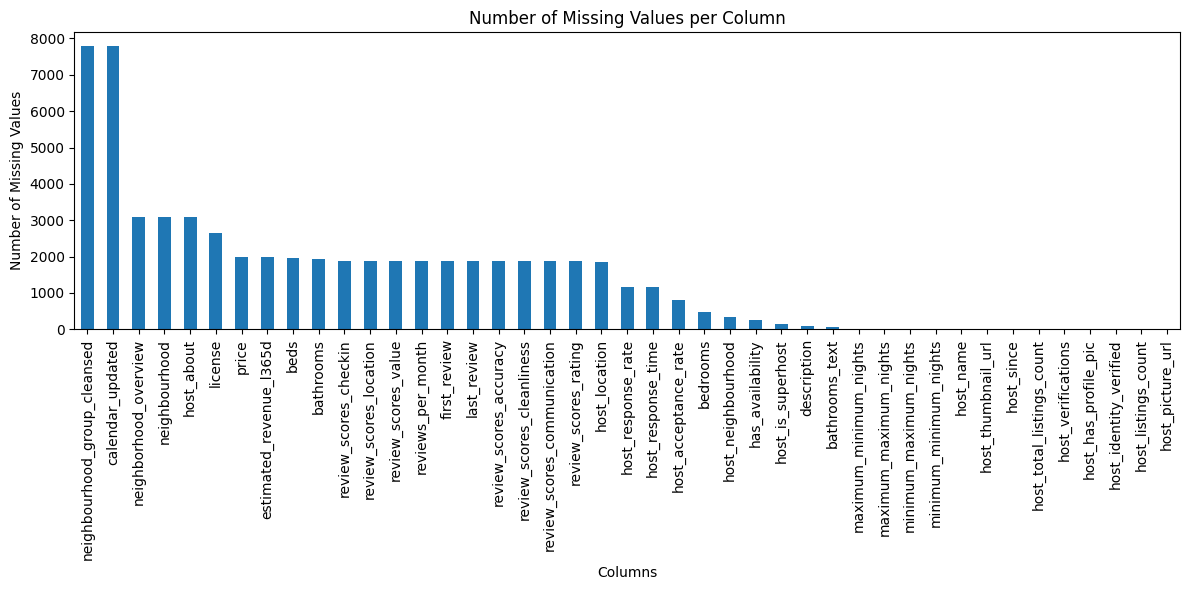

In [9]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Number of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### ✍️ Your Response: 🔧
1. Neighbourhood Group clensed, calender updated are tied for the most amount of missing values. Neighborhood overview, neighborhood, and host_about are tied for 3rd most missing values.

2. I am unsure exactly what each of these columns deal with, but judging based on name alone, I would assume calendar updated and neighborhood would cause the most business problems. As for all of the data in general, I would assume that the missing values in price and license would be a major issue.

3. I think missing values like first review and host review rate could be dropped without major bussiness backlash.


## 3. Drop Columns That Aren’t Useful

Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In Your Response:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



In [6]:
# Add code here 🔧
df.dropna(first_review)

NameError: name 'first_review' is not defined

### ✍️ Your Response: 🔧
1.

2.

3.



## 4. Fill or Fix Values in Key Columns

Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your response:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

In [12]:
# Get the number of rows before dropping
rows_before = df.shape[0]

# Drop rows with missing values in specified columns
df.dropna(subset=['first_review', 'host_response_rate'], inplace=True)

# Get the number of rows after dropping
rows_after = df.shape[0]

# Print the number of rows dropped
print(f"Number of rows dropped: {rows_before - rows_after}")

# Display the info to see the effect
df.info()

Number of rows dropped: 2575
<class 'pandas.core.frame.DataFrame'>
Index: 5205 entries, 0 to 7740
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5205 non-null   int64  
 1   listing_url                                   5205 non-null   object 
 2   scrape_id                                     5205 non-null   int64  
 3   last_scraped                                  5205 non-null   object 
 4   source                                        5205 non-null   object 
 5   name                                          5205 non-null   object 
 6   description                                   5165 non-null   object 
 7   neighborhood_overview                         3333 non-null   object 
 8   picture_url                                   5205 non-null   object 
 9   host_id                                

### ✍️ Your Response: 🔧
1. I cleaned first_review and host response rate

2. I dropped both of them. First review and host response rate was an object, so dropping them wouldn't affect data outputs much

3. There is a risk that customers are off put by not seeing how often a host responds, and reviews may be a bit innacurate without the first review. All in all the effect should not be too big though.


## 5. Convert and Clean Data Types

Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In Your Response: :
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


In [8]:
# Check unique values and their counts before conversion
print("Unique values in 'has_availability' before conversion:")
print(df['has_availability'].value_counts(dropna=False))

# Convert 'has_availability' to boolean
# Ensure we are working with the DataFrame after dropping rows
df['has_availability'] = df['has_availability'].map({'t': True, 'f': False})

# Check unique values and their counts after conversion
print("\nUnique values in 'has_availability' after conversion:")
print(df['has_availability'].value_counts(dropna=False))


# Check the data type after conversion
df.info()

Unique values in 'has_availability' before conversion:
has_availability
t      7524
NaN     256
Name: count, dtype: int64

Unique values in 'has_availability' after conversion:
has_availability
True    7524
NaN      256
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7780 entries, 0 to 7779
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7780 non-null   int64  
 1   listing_url                                   7780 non-null   object 
 2   scrape_id                                     7780 non-null   int64  
 3   last_scraped                                  7780 non-null   object 
 4   source                                        7780 non-null   object 
 5   name                                          7780 non-null   object 
 6   description                               

### ✍️ Your Response: 🔧
1. I changed has availibility.

2. I changed the data type into boolean.

3. This helps prepare the data for later use because boolean is easier to use and makes more sense than using an object for the has availibility column. Either a property has openings or it doesn't.

## 6. Remove Duplicate Records

Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

- Check for rows that are exact duplicates
- If your data has an ID column and each ID is supposed to unique, then make sure there are no duplicate IDs
- Remove duplicates if found

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


In [9]:
# Check for exact duplicate rows
duplicate_rows = df.duplicated().sum()

print(f"Number of exact duplicate rows: {duplicate_rows}")

Number of exact duplicate rows: 0


### ✍️ Your Response: 🔧 🔧
1. I did not find any exact duplicated rows

2. This isn't applicable.

3. Duplicates can cause duobled bookings for the same property, inflate good or bad reviews, and make property data unreliable.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```





In [21]:
# export csv here 🔧
df.to_csv('cleaned_airbnb_data.csv', index=False)

## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


### ✍️ Your Response: 🔧

1. __  
2. __  
3. __  
4. __  
5. __  


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [ ]:
!jupyter nbconvert --to html "assignment_06_LastnameFirstname.ipynb"